In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pylab as pl
#import xlrd
import sklearn
import math
import os
import re
import copy
from numba import njit
from numba import prange
import plotly
from datetime import date


plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objects as go
from time import time
import sklearn
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline

from sklearn.datasets import make_regression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error as MAPE

from os import listdir
from os.path import isfile, join

from sklearn.linear_model import Ridge
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean

from scipy import stats

In [ ]:
##########################
# SAVE-LOAD using pickle #
##########################
# !pip install varname
import pickle
# from varname import nameof


# save
def saver(model, model_name):
    with open(path_import + '/' + model_name + '.pkl','wb') as f:
        pickle.dump(model, f)
        print('saved in ' + str(f.name))

# load
def opener(model_name):
    name = str(model_name)
    name = path_import + '/' + name + '.pkl'
    print(name)
    with open(name, 'rb') as f:
        model = pickle.load(f)
    return model

In [ ]:
root_dir = "C:/Users/Dmitriy/Desktop/Benchmark_for_ANN/"
path_import = root_dir + '720/'
path_import

'C:/Users/Dmitriy/Desktop/Benchmark_for_ANN/720/'

## Загрузка обученных моделей

In [ ]:
poly_stress_best = opener(model_name='scaled_ridge_stress_deg10alpha_1')[0]
poly_strain_best = opener(model_name='scaled_ridge_strain_deg8alpha_10')[0]

C:/Users/Dmitriy/Desktop/Benchmark_for_ANN/720//scaled_ridge_stress_deg10alpha_1.pkl
C:/Users/Dmitriy/Desktop/Benchmark_for_ANN/720//scaled_ridge_strain_deg8alpha_10.pkl


C:\Users\Dmitriy\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:376: InconsistentVersionWarning:

Trying to unpickle estimator StandardScaler from version 1.2.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

C:\Users\Dmitriy\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:376: InconsistentVersionWarning:

Trying to unpickle estimator PolynomialFeatures from version 1.2.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

C:\Users\Dmitriy\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:376: InconsistentVersionWarning:

Trying to unpickle estimator Ridge from version 1.2.2 when using version 1.5.1

In [ ]:
strain_11_10_ann = opener('strain_11_10')

C:/Users/Dmitriy/Desktop/Benchmark_for_ANN/720//strain_11_10.pkl


C:\Users\Dmitriy\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:376: InconsistentVersionWarning:

Trying to unpickle estimator MLPRegressor from version 1.2.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations



In [ ]:
stress_14n_25l = opener('stress_14n_25l')

C:/Users/Dmitriy/Desktop/Benchmark_for_ANN/720//stress_14n_25l.pkl


In [ ]:
X_train_fair_stress = opener('X_train_fair_stress')
y_train_fair_stress = opener('y_train_fair_stress')
X_val_fair_stress = opener('X_val_fair_stress')
y_val_fair_stress = opener('y_val_fair_stress')
val_other_X_1_stress = opener('val_other_X_1_stress')
val_other_y_1_stress = opener('val_other_y_1_stress')

X_train_fair_eps = opener('X_train_fair_eps')
y_train_fair_eps = opener('y_train_fair_eps')
X_val_fair_eps = opener('X_val_fair_eps')
y_val_fair_eps = opener('y_val_fair_eps')
other_X_val_fair_eps = opener('other_X_val_fair_eps')
other_y_val_fair_eps = opener('other_y_val_fair_eps')

C:/Users/Dmitriy/Desktop/Benchmark_for_ANN/720//X_train_fair_stress.pkl
C:/Users/Dmitriy/Desktop/Benchmark_for_ANN/720//y_train_fair_stress.pkl
C:/Users/Dmitriy/Desktop/Benchmark_for_ANN/720//X_val_fair_stress.pkl
C:/Users/Dmitriy/Desktop/Benchmark_for_ANN/720//y_val_fair_stress.pkl
C:/Users/Dmitriy/Desktop/Benchmark_for_ANN/720//val_other_X_1_stress.pkl
C:/Users/Dmitriy/Desktop/Benchmark_for_ANN/720//val_other_y_1_stress.pkl
C:/Users/Dmitriy/Desktop/Benchmark_for_ANN/720//X_train_fair_eps.pkl
C:/Users/Dmitriy/Desktop/Benchmark_for_ANN/720//y_train_fair_eps.pkl
C:/Users/Dmitriy/Desktop/Benchmark_for_ANN/720//X_val_fair_eps.pkl
C:/Users/Dmitriy/Desktop/Benchmark_for_ANN/720//y_val_fair_eps.pkl
C:/Users/Dmitriy/Desktop/Benchmark_for_ANN/720//other_X_val_fair_eps.pkl
C:/Users/Dmitriy/Desktop/Benchmark_for_ANN/720//other_y_val_fair_eps.pkl


In [ ]:
X_val_fair_stress //128
poly_stress_0 =[]
for i in range(0, len(y_val_fair_stress) // 20):
    if X_val_fair_stress[i*20][4] == 0.0 :
        poly_stress_0.append(poly_stress_best.predict(X_val_fair_stress[i*20:(i+1)*20]))

np.array(poly_stress_0).shape

(128, 20)

In [ ]:
np.array(y_val_fair_eps).shape

(2560,)

In [ ]:
i=0
X_val_fair_stress[i*20:(i+1)*20]

array([[ 0.2       ,  1.        , 16.        ,  0.1       ,  0.        ],
       [ 0.2       ,  1.        , 16.        ,  0.1       ,  0.05263158],
       [ 0.2       ,  1.        , 16.        ,  0.1       ,  0.10526316],
       [ 0.2       ,  1.        , 16.        ,  0.1       ,  0.15789474],
       [ 0.2       ,  1.        , 16.        ,  0.1       ,  0.21052632],
       [ 0.2       ,  1.        , 16.        ,  0.1       ,  0.26315789],
       [ 0.2       ,  1.        , 16.        ,  0.1       ,  0.31578947],
       [ 0.2       ,  1.        , 16.        ,  0.1       ,  0.36842105],
       [ 0.2       ,  1.        , 16.        ,  0.1       ,  0.42105263],
       [ 0.2       ,  1.        , 16.        ,  0.1       ,  0.47368421],
       [ 0.2       ,  1.        , 16.        ,  0.1       ,  0.52631579],
       [ 0.2       ,  1.        , 16.        ,  0.1       ,  0.57894737],
       [ 0.2       ,  1.        , 16.        ,  0.1       ,  0.63157895],
       [ 0.2       ,  1.        , 16. 

## Для построения графиков получаемых предсказаний

In [ ]:
# @title Функция для подсчета максимальной средней ошибки для графиков
def max_graph_er(pred, ground_true):

    maxerror = 0
    for i in range(0, len(pred)//20):
        cmape = sklearn.metrics.mean_absolute_percentage_error(ground_true[i*20:(i+1)*20], pred[i*20:(i+1)*20]) *100
        maxerror = cmape if cmape > maxerror else maxerror

    return maxerror

In [ ]:
# @title Функция для подсчета медианной средней ошибки для графиков
def med_graph_er(pred, ground_true):

    mapes = np.zeros((len(pred)//20))
    for i in range(0, len(pred)//20):
        cmape = sklearn.metrics.mean_absolute_percentage_error(ground_true[i*20:(i+1)*20], pred[i*20:(i+1)*20]) *100
        mapes[i] = cmape
    med = min(mapes, key=lambda x:abs(x-np.median(mapes)))
    return med

In [ ]:
# @title Функция для подсчета минимальной средней ошибки для графиков
def min_graph_er(pred, ground_true):

    minerror = 1e10
    for i in range(0, len(pred)//20):
        cmape = sklearn.metrics.mean_absolute_percentage_error(ground_true[i*20:(i+1)*20], pred[i*20:(i+1)*20]) *100
        minerror = cmape if cmape < minerror else minerror

    return minerror

minge [ 0.1   0.75 16.    0.05] MMAPE =  1.45 MAPE =  1.45227
medge [0.1  0.75 8.   0.05] MMAPE =  7.07 MAPE =  7.07016
maxge [0.25  0.1   4.    0.025] MMAPE =  39.43 MAPE =  7.56064


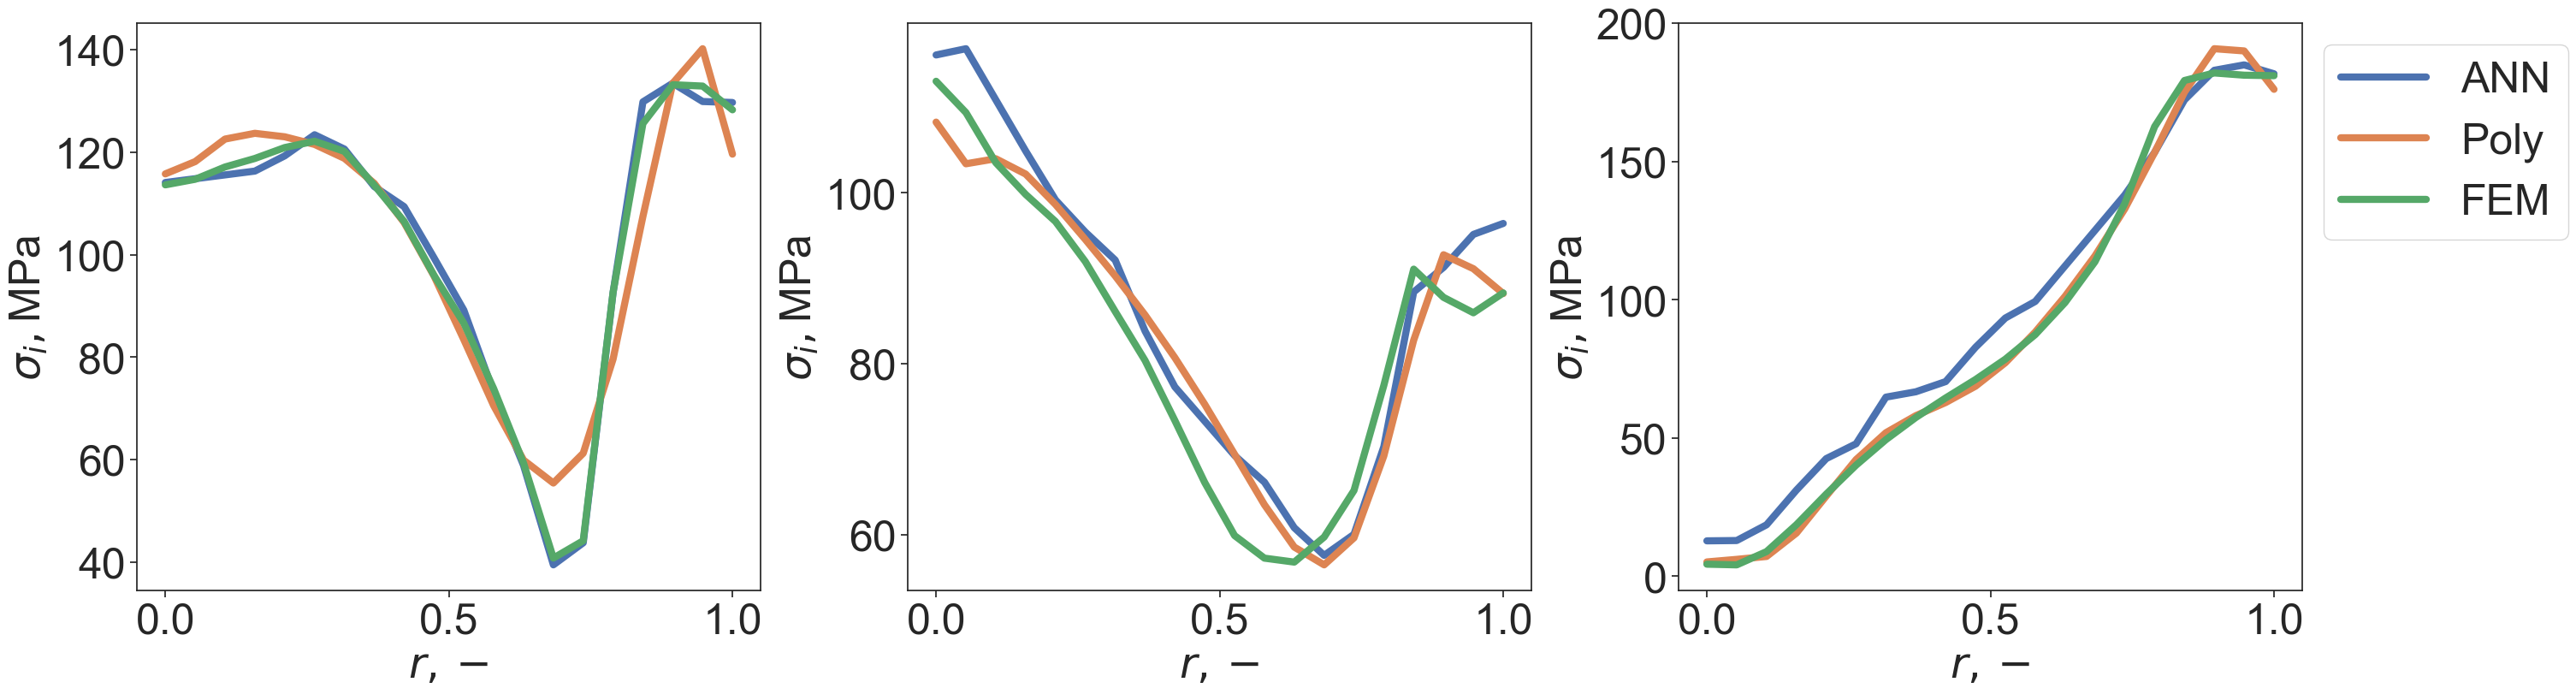

In [ ]:
# @title построение графиков с несколькими сабплотами

today = str(date.today())

#gr_set = 'train'
gr_set = 'test'
#gr_set = 'val'

k = 3/2 *1.
# k = 1.


variable = 'stress'
#variable = 'strain'


if variable == 'stress':
    if gr_set == 'train':
        iks = X_train_fair_stress
        igrek = y_train_fair_stress
    if gr_set == 'test':
        iks = X_val_fair_stress
        igrek = y_val_fair_stress
    if gr_set == 'val':
        iks = val_other_X_1_stress
        igrek = val_other_y_1_stress
    deg = 10
    mod = poly_stress_best
    ann = stress_14n_25l#stress_sassv_lbfgs_15_27#stress_26_14_ann#sassv2514_new_1

if variable == 'strain':
    if gr_set == 'train':
        iks = X_train_fair_eps
        igrek = y_train_fair_eps
    if gr_set == 'test':
        iks = X_val_fair_eps
        igrek = y_val_fair_eps
    if gr_set == 'val':
        iks = other_X_val_fair_eps
        igrek = other_y_val_fair_eps
    deg = 8
    mod = poly_strain_best
    ann = strain_11_10_ann

instr = mod
instr = ann

plt.rcParams['font.size'] = 24*k
sns.set_theme(style='white')
sns.set_style("ticks", {"xtick.major.size": 20*k, "ytick.major.size": 20*k})

max_mape = round(MAPE(igrek.reshape(1, -1), instr.predict(iks).reshape(1, -1), multioutput='raw_values').max()* 100, 5)
maxge = max_graph_er(instr.predict(iks), igrek)
medge = med_graph_er(instr.predict(iks), igrek)
minge = min_graph_er(instr.predict(iks), igrek)

fig, ax = plt.subplots(1, 3, figsize=(30, 8))
fig.set_layout_engine('compressed')
for i in range(0, len(igrek) // 20):
    #if iks[i*20][0] == 0.25 and iks[i*20][1] == 0.3 and iks[i*20][2] == 12 and iks[i*20][3] == 0.1:
    #if iks[i*20][0] == 0.05 and iks[i*20][1] == 0.5 and iks[i*20][2] == 12 and iks[i*20][3] == 0.05:
    # if iks[i*20][0] == 0.25 and iks[i*20][1] == 0.75 and iks[i*20][2] == 4 and iks[i*20][3] == 0.05:

    # if iks[i*20][0] == 0.15 and iks[i*20][1] == 1. and iks[i*20][2] == 16 and iks[i*20][3] == 0.1:
    # if iks[i*20][0] == 0.05 and iks[i*20][1] == 0.1 and iks[i*20][2] == 4 and iks[i*20][3] == 0.05:
    # if iks[i*20][0] == 0.25 and iks[i*20][1] == 1. and iks[i*20][2] == 4 and iks[i*20][3] == 0.025:

    # if iks[i*20][0] == 0.05 and iks[i*20][1] == 0. and iks[i*20][2] == 16 and iks[i*20][3] == 0.05:
    # if iks[i*20][0] == 0.15 and iks[i*20][1] == 0.3 and iks[i*20][2] == 20 and iks[i*20][3] == 0.1:
    # if iks[i*20][0] == 0.1 and iks[i*20][1] == 1.0 and iks[i*20][2] == 8 and iks[i*20][3] == 0.025:

    # if iks[i*20][0] == 0.015 and iks[i*20][1] == 0.3 and iks[i*20][2] == 4 and iks[i*20][3] == 0.1:
    # if iks[i*20][0] == 0.15 and iks[i*20][1] == 0. and iks[i*20][2] == 4 and iks[i*20][3] == 0.1:
    # if iks[i*20][0] == 0.1 and iks[i*20][1] == 0.75 and iks[i*20][2] == 4 and iks[i*20][3] == 0.025:


    # if iks[i*20][0] == 0.015 and iks[i*20][1] == 0.3 and iks[i*20][2] == 4 and iks[i*20][3] == 0.1:
    # if iks[i*20][0] == 0.1 and iks[i*20][1] == 1. and iks[i*20][2] == 8 and iks[i*20][3] == 0.025:
    # if iks[i*20][0] == 0.17 and iks[i*20][1] == .4 and iks[i*20][2] == 14 and iks[i*20][3] == 0.075:
    # if iks[i*20][0] == 0.19 and iks[i*20][1] == .9 and iks[i*20][2] == 14 and iks[i*20][3] == 0.075:

    # for i in range(0, 1):
    #plt.clf()


    if np.abs(max_graph_er(instr.predict(iks[i*20:(i+1)*20]), igrek[i*20:(i+1)*20]) - minge) < 0.001:
        ax[0].plot(np.linspace(0, 1, 20),
                ann.predict(iks[i*20:(i+1)*20]),
                linewidth=4*k,
                label='ANN'
                )
        ax[0].plot(np.linspace(0, 1, 20),
                 mod.predict(iks[i*20:(i+1)*20]),
                 linewidth=4*k,
                 label='Poly'
                 )
        ax[0].plot(np.linspace(0, 1, 20),
                igrek[i*20:(i+1)*20],
                linewidth=4*k,
                label='FEM'
                )
        current_mape_ann = round(MAPE(igrek[i*20:(i+1)*20], ann.predict(iks[i*20:(i+1)*20])) * 100, 5)
        current_mape = round(MAPE(igrek[i*20:(i+1)*20], instr.predict(iks[i*20:(i+1)*20])) * 100, 5)


        print('minge', iks[i*20][:-1], 'MMAPE = ', round(minge, 2), 'MAPE = ', current_mape)

    if np.abs(max_graph_er(instr.predict(iks[i*20:(i+1)*20]), igrek[i*20:(i+1)*20]) - medge) < 0.001:
        ax[1].plot(np.linspace(0, 1, 20),
                ann.predict(iks[i*20:(i+1)*20]),
                linewidth=4*k,
                label='ANN'
                )
        ax[1].plot(np.linspace(0, 1, 20),
                 mod.predict(iks[i*20:(i+1)*20]),
                 linewidth=4*k,
                 label='Poly'
                 )
        ax[1].plot(np.linspace(0, 1, 20),
                igrek[i*20:(i+1)*20],
                linewidth=4*k,
                label='FEM'
                )
        # print('medge', iks[i*20][:-1])
        current_mape = round(MAPE(igrek[i*20:(i+1)*20], instr.predict(iks[i*20:(i+1)*20])) * 100, 5)

        print('medge', iks[i*20][:-1], 'MMAPE = ', round(medge, 2), 'MAPE = ', current_mape)


    if np.abs(max_graph_er(instr.predict(iks[i*20:(i+1)*20]), igrek[i*20:(i+1)*20]) - maxge) < 0.001:
        ax[2].plot(np.linspace(0, 1, 20),
                ann.predict(iks[i*20:(i+1)*20]),
                linewidth=4*k,
                label='ANN'
                )
        ax[2].plot(np.linspace(0, 1, 20),
                 mod.predict(iks[i*20:(i+1)*20]),
                 linewidth=4*k,
                 label='Poly'
                 )
        ax[2].plot(np.linspace(0, 1, 20),
                igrek[i*20:(i+1)*20],
                linewidth=4*k,
                label='FEM'
                )
        # print('maxge', iks[i*20][:-1])
        current_mape = round(MAPE(igrek[i*20:(i+1)*20], mod.predict(iks[i*20:(i+1)*20])) * 100, 5)

        print('maxge', iks[i*20][:-1], 'MMAPE = ', round(maxge, 2), 'MAPE = ', current_mape)

        # plt.xlabel('$r, -$', fontsize=24*k)

        plt.legend(loc="upper left", bbox_to_anchor=(1,1), fontsize=24*k)

        # Make the ticks bigger
        for a in ax:
            a.tick_params(axis='both', which='major', labelsize=24*k)
            a.set_xlabel('$r, -$', fontsize=24*k)
            if variable == 'stress':
                a.set_ylabel(r'$\sigma_i, $MPa', fontsize=24*k)
            elif variable == 'strain':
                a.set_ylabel(r'$\varepsilon_i, -$', fontsize=24*k)

        # ax.set_title('Title', fontsize=14)
        description_array = iks[i*20][:-1]
        description = ''
        pars = ['red', 'cal', 'ha', 'fric']
        for co in range(len(description_array)):
            description += pars[co]
            description += str(description_array[co])
            description += '_'
        # plt.subplots_adjust(left=0.17, bottom=0.15)

        current_mape = round(MAPE(igrek[i*20:(i+1)*20], mod.predict(iks[i*20:(i+1)*20])) * 100, 5)
        current_mape_ann = round(MAPE(igrek[i*20:(i+1)*20], ann.predict(iks[i*20:(i+1)*20])) * 100, 5)

        # print('max_graph_er poly = ', round(max_graph_er(mod.predict(iks), igrek), 5), '%')
        # print('max_graph_er ann = ', round(maxge, 5), '%')
        # print('max mape poly = ', max_mape , '%')
        # print('graph below poly mape = ', current_mape , '%')
        # print('graph below ann mape = ', current_mape_ann , '%')

#path_graph = '/content/drive/MyDrive/article/' + today + '/'
#if not os.path.exists(path_graph):
#    os.mkdir(path_graph)
#path_graph = path_graph + description + '_' + variable + '.png'
#print(path_graph)
#plt.savefig(path_graph, dpi=600)
plt.show()

## Для выделения значение на тестовом множестве и предсказний моделей на нем

## По поперечному сечению

## Напряжения

In [ ]:
fem_stress = []
for i in range(0, len(y_val_fair_stress) // 20):
        fem_stress.append(y_val_fair_stress[i*20:(i+1)*20])
(fem_stress)

[array([ 36.61799545,  33.27073451,  29.68311019,  30.54200807,
         32.87808029,  39.06206656,  47.42496549,  57.44772767,
         69.21346072,  80.97578157,  93.74516804, 108.40008576,
        123.99867773, 136.75434263, 160.1585969 , 185.80730273,
        193.1689014 , 194.38083233, 193.10829685, 190.98287807]),
 array([124.67485229, 125.29558573, 126.29314593, 127.58841616,
        128.76047095, 126.80274747, 119.9766959 , 115.32111164,
        108.97026581,  99.93156778,  92.35332781,  77.3328755 ,
         65.76748237,  48.55015645,  47.56312701,  68.22855351,
        105.97635656, 117.64150864, 117.74963917, 117.10603578]),
 array([119.31586503, 120.135854  , 121.53298166, 123.03293943,
        124.92331076, 125.10077785, 122.82397425, 116.47528922,
        109.47849582,  99.20483629,  89.25259398,  76.46369839,
         61.59945382,  42.36098007,  42.66478649,  89.96736151,
        122.58652526, 130.40169651, 130.5490916 , 125.8783221 ]),
 array([ 46.26247206,  53.11426215

In [ ]:
poly_stress =[]
for i in range(0, len(y_val_fair_stress) // 20):
    if X_val_fair_stress[i*20][4] == 0.0 :
        poly_stress.append(poly_stress_best.predict(X_val_fair_stress[i*20:(i+1)*20]))

poly_stress

[array([ 41.772385  ,  38.09374577,  32.14395567,  28.03850309,
         29.554835  ,  36.55256317,  46.58842036,  57.27929629,
         67.62807822,  78.09788565,  89.94157407, 104.40603677,
        122.17580613, 143.03869679, 165.48869021, 186.06888483,
        198.94107587, 197.68933417, 183.96377317, 191.48847724]),
 array([128.25504156, 125.16850672, 127.7120607 , 127.89104601,
        125.66538087, 121.906086  , 116.9280881 , 110.68341051,
        103.03788051,  93.8636867 ,  83.20045827,  71.70996058,
         61.31495618,  55.51221886,  58.62405754,  73.44295759,
         97.57102852, 120.50080798, 126.36756217, 111.56649156]),
 array([114.85903727, 118.42315828, 122.83810813, 123.72384478,
        122.73589672, 120.93752963, 118.03697217, 113.24924233,
        106.02888432,  96.34625165,  84.78680562,  72.78118785,
         62.9645213 ,  59.25744469,  65.99974089,  85.59102853,
        114.84279912, 141.86304608, 148.01979981, 123.60400026]),
 array([ 53.2297285 ,  56.12280604

In [ ]:
ann_14_25 =[]
for i in range(0, len(y_val_fair_stress) // 20):
    if X_val_fair_stress[i*20][4] == 0.0 :
        ann_14_25.append(stress_14n_25l.predict(X_val_fair_stress[i*20:(i+1)*20]))

ann_14_25

[array([ 38.78013854,  32.21855162,  31.04731067,  28.05076197,
         28.59230906,  41.66127554,  50.86490709,  56.29432719,
         64.99785139,  73.43513449,  88.6461472 ,  99.73681643,
        115.37020359, 140.40358778, 158.07767717, 173.87930874,
        185.47030765, 187.26609137, 187.01580528, 184.14913541]),
 array([113.53150069, 115.19087721, 116.85025373, 119.46940604,
        116.40602272, 118.51162462, 113.19179691, 107.62297725,
        107.10940838,  90.17188537,  83.41270185,  70.33505737,
         62.68437933,  52.42800844,  53.88779653,  68.50800493,
        108.17607877, 115.24240068, 124.21442507, 115.5492983 ]),
 array([111.11842023, 111.860979  , 112.60353778, 113.86796343,
        116.25067476, 121.47079261, 119.03181347, 112.82633203,
        108.79396511,  97.30471328,  90.63239169,  73.58062138,
         59.2683887 ,  39.0771141 ,  40.66337349,  89.17665569,
        127.59044879, 131.42042493, 128.65558229, 130.55439638]),
 array([ 58.73515951,  59.75857111

## Деформации

In [ ]:
fem_strain = []
for i in range(0, len(y_val_fair_stress) // 20):
        fem_strain.append(y_val_fair_eps[i*20:(i+1)*20])
np.array(fem_strain).shape

(128, 20)

In [ ]:
poly_strain =[]
for i in range(0, len(y_val_fair_eps) // 20):
    if X_val_fair_eps[i*20][4] == 0.0 :
        poly_strain.append(poly_strain_best.predict(X_val_fair_eps[i*20:(i+1)*20]))

len(poly_strain)

128

In [ ]:
ann_strain_11_10 =[]
for i in range(0, len(y_val_fair_eps) // 20):
    ann_strain_11_10.append(strain_11_10_ann .predict(X_val_fair_eps[i*20:(i+1)*20]))

ann_strain_11_10

[array([0.66245514, 0.66890547, 0.67535954, 0.680945  , 0.68641289,
        0.69823411, 0.71026858, 0.72194593, 0.72709739, 0.74627334,
        0.7468485 , 0.73471444, 0.72036603, 0.71452231, 0.71282452,
        0.70750034, 0.70142198, 0.69534362, 0.69121699, 0.68908213]),
 array([0.85917182, 0.86772123, 0.87087085, 0.85510537, 0.85038161,
        0.8631807 , 0.87401789, 0.8751424 , 0.87116534, 0.88481943,
        0.8817165 , 0.87690904, 0.87269815, 0.87265792, 0.87261768,
        0.87257745, 0.87253722, 0.87249698, 0.87245675, 0.87241651]),
 array([0.47809456, 0.49286525, 0.50888167, 0.52277218, 0.53589888,
        0.54652796, 0.55715704, 0.56711571, 0.57862599, 0.59865193,
        0.6172486 , 0.63602484, 0.64877843, 0.66204575, 0.69527204,
        0.68998158, 0.67525107, 0.64841933, 0.61334022, 0.57826111]),
 array([0.65749155, 0.66394563, 0.6703997 , 0.67701042, 0.68323321,
        0.68533406, 0.68678967, 0.69124319, 0.68698721, 0.66635675,
        0.6862434 , 0.70368345, 0.70408053

## По продольному сечению

## Напряжения

In [ ]:
fem_stress_1 = []
for j in range(0,20):
    fem = []
    for i in range(0, len(y_val_fair_stress) // 20):
        fem.append(y_val_fair_stress[i*20:(i+1)*20][j])
    fem_stress_1.append(fem)
fem_stress_1

[[36.61799545444699,
  124.6748522946821,
  119.31586502689291,
  46.26247206319069,
  82.88244175915668,
  81.43177083586801,
  33.928083626663074,
  65.58475516791908,
  131.68810106751988,
  113.61151980469037,
  34.17211528388424,
  126.34006116943932,
  62.74402593792726,
  105.57746796762267,
  57.97503553502634,
  79.71349794279008,
  61.39330285606646,
  84.85358500449051,
  85.78446999577872,
  75.18638204645536,
  38.33525283851708,
  41.22550196849881,
  49.277896584686005,
  78.6510608299816,
  65.50491707429472,
  80.31058123584423,
  135.74758353219914,
  149.76250008045628,
  126.64341886453269,
  11.98263752904704,
  98.80949854677418,
  77.69640482700808,
  108.4576825564405,
  20.633106894583456,
  93.03941263057891,
  27.963407656276413,
  35.74916933883119,
  103.27186971016056,
  92.41094235592506,
  46.560893784843806,
  2.4192150272907385,
  65.35046950493616,
  95.33404553358443,
  65.83018641131154,
  37.869230699719296,
  105.02589997743412,
  117.232411911784

In [ ]:
poly_stress_1 =[]
for j in range(0,20):
    poly = []
    for i in range(0, len(y_val_fair_stress) // 20):
        if X_val_fair_stress[i*20][4] == 0.0 :
            poly.append(poly_stress_best.predict(X_val_fair_stress[i*20:(i+1)*20])[j])
    poly_stress_1.append(poly)
poly_stress_1

[[41.77238500058276,
  128.2550415618802,
  114.85903727046708,
  53.22972850133574,
  80.78329309742028,
  83.56784174046687,
  28.061562360701842,
  63.00527101479089,
  125.60001429096066,
  115.75241039181454,
  33.20873409415948,
  129.0049934766696,
  66.80529220964577,
  103.339997446554,
  56.24163082869747,
  77.80261695950422,
  62.73909767457373,
  81.49849745618998,
  84.47085510643838,
  72.79853476600537,
  36.4634299765744,
  56.57809838505251,
  52.0493087387289,
  48.187047554586755,
  67.40301475639167,
  81.03937749897467,
  136.0311199461858,
  148.66786414664534,
  110.5926053796651,
  9.901274451699479,
  99.22696918748535,
  80.35626511635401,
  106.59630368282184,
  17.556028832201733,
  89.32137086028554,
  12.966697617373725,
  35.08383447118372,
  78.79817029534875,
  86.44433341522371,
  33.16374091782565,
  0.35834106992639647,
  66.58055155418656,
  93.9424419400416,
  66.62826953457224,
  41.864478997608714,
  106.04359859340049,
  115.70434701729597,
  7

In [ ]:
ann_14_25_1 =[]
for k in range(0,20):
    ann = []
    for i in range(0, len(y_val_fair_stress) // 20):
        if X_val_fair_stress[i*20][4] == 0.0 :
            ann.append(stress_14n_25l.predict(X_val_fair_stress[i*20:(i+1)*20])[k])
    ann_14_25_1.append(ann)
ann_14_25_1

[[38.78013853909877,
  113.53150068502117,
  111.1184202256373,
  58.73515950748975,
  83.23572059658935,
  78.80486439207311,
  33.70943630485766,
  57.64713354412284,
  140.94388725841208,
  114.06727070977627,
  37.44237055027824,
  106.57938798074498,
  60.323842920646136,
  106.9130764743814,
  49.87183949721938,
  81.36226342727014,
  55.173526298658416,
  83.48825893714661,
  77.32292814534617,
  84.07686995267363,
  37.67469671685588,
  52.37240605494559,
  59.892957910935706,
  80.22781020274587,
  58.93954002625121,
  79.38756011615021,
  121.62292685691807,
  120.6237010560285,
  133.8477515674724,
  14.058511184746147,
  95.37267196703061,
  85.17826806798315,
  110.08574314413627,
  20.14991255876187,
  86.44979905280766,
  33.31126898169675,
  32.04688998252285,
  104.73324623831219,
  85.38881774446438,
  41.363812686757456,
  13.557067031362195,
  59.40919855076372,
  94.05423696069266,
  61.70888003255099,
  35.63267541483804,
  96.14417304405094,
  108.96314179669443,

## Деформации

In [ ]:
ann_strain_11_10_1 =[]
for k in range(0,20):
    ann = []
    for i in range(0, len(y_val_fair_eps) // 20):
        if X_val_fair_stress[i*20][4] == 0.0 :
            ann.append(strain_11_10_ann.predict(X_val_fair_eps[i*20:(i+1)*20])[k])
    ann_strain_11_10_1.append(ann)
ann_strain_11_10_1

[[0.6624551439285236,
  0.8591718218280232,
  0.47809455742881796,
  0.657491549636208,
  0.04186839146737732,
  0.06516003953925616,
  0.8610398591597118,
  0.48515083542282517,
  0.862714352764039,
  0.48143572076330954,
  0.04563599379869383,
  0.06469656324593544,
  0.15750298207936708,
  0.4757929865018363,
  0.14451501151423002,
  0.3125969699351647,
  0.47717728228243317,
  0.8722302147480961,
  0.8580747470557666,
  0.8778172657718459,
  0.6563223884476301,
  0.8548511141194722,
  0.06874080812079043,
  0.8582500728328661,
  0.06488811216327507,
  0.04294484569092806,
  0.4845329066611278,
  0.8730501288494459,
  0.06303383911396111,
  0.046608487515429245,
  0.4860924671075637,
  0.3181397119607832,
  0.043321080990437036,
  0.6590045996627037,
  0.06420678971912387,
  0.062290126678407845,
  0.8774044377556427,
  0.4759013585993697,
  0.8637334095927106,
  0.665881530214389,
  0.1439347432992265,
  0.48583103273483746,
  0.4789120447353137,
  0.06407252118008146,
  0.48283241

In [ ]:
poly_strain_1 =[]
for j in range(0,20):
    poly = []
    for i in range(0, len(y_val_fair_eps) // 20):
        if X_val_fair_eps[i*20][4] == 0.0 :
            poly.append(poly_strain_best.predict(X_val_fair_eps[i*20:(i+1)*20])[j])
    poly_strain_1.append(poly)
#len((poly_strain_1)[0])
poly_strain_1

[[0.6555313936763991,
  0.8692438378600211,
  0.5067504630120501,
  0.6529972703886697,
  0.048042004406137984,
  0.07690299029667857,
  0.8638169891384527,
  0.5007335895754419,
  0.8653499511572759,
  0.4985154222116899,
  0.06315416588519396,
  0.07822127592035266,
  0.1572435195522292,
  0.4757834649304141,
  0.1571609936781012,
  0.33549713562271927,
  0.49058427024845697,
  0.8652396864199609,
  0.8763810971732975,
  0.8640622452709399,
  0.6544692303450832,
  0.8542983113830999,
  0.08959854530463424,
  0.8642261010064781,
  0.07661550008760798,
  0.04656217593618883,
  0.492944662128506,
  0.859829495556722,
  0.07511837937801924,
  0.04424780034454706,
  0.4727772560972955,
  0.32789411736795654,
  0.04022668046440048,
  0.6520144399209828,
  0.07885218128531468,
  0.07231054786769286,
  0.8679695183057609,
  0.5104757809335059,
  0.8564729456908613,
  0.6786267462159825,
  0.16999238244359954,
  0.5039196359842313,
  0.5008008565223532,
  0.07158937998281867,
  0.498655294411

In [ ]:
fem_strain_1 = []
for j in range(0,20):
    fem = []
    for i in range(0, len(y_val_fair_eps) // 20):
        fem.append(y_val_fair_eps[i*20:(i+1)*20][j])
    fem_strain_1.append(fem)
fem_strain_1

[[0.6694047516067914,
  0.8640032830482632,
  0.49301591917976884,
  0.6715436165103108,
  0.04488333766833745,
  0.07553317819255521,
  0.8646715024040031,
  0.4881970106846679,
  0.8629890110967301,
  0.48820372053804606,
  0.0437379877022804,
  0.07568209735535016,
  0.1548811701227128,
  0.48789595520025864,
  0.15673617394631398,
  0.3152986582587214,
  0.48609488908697646,
  0.8628037357784972,
  0.8633925931342512,
  0.8637369535249418,
  0.6716557156630497,
  0.8632333527461059,
  0.07598098062705362,
  0.8639375823591828,
  0.07553498593739989,
  0.04442263099996668,
  0.48736360454559996,
  0.8626663252258255,
  0.07659740935057006,
  0.04563651172778217,
  0.4862979005692937,
  0.3160934694017241,
  0.04540653119326337,
  0.669299085286744,
  0.07586892976153017,
  0.0766363967215787,
  0.8651379988793374,
  0.4889426702590257,
  0.863305203873264,
  0.6704522490377475,
  0.15340415850926822,
  0.48800865064918203,
  0.4882997006206869,
  0.07657873838450983,
  0.48765507655

In [ ]:
len(y_val_fair_eps) //20

128

In [ ]:
MAPE_ann_strain = []
MAPE_poly_strain = []
MSPE_ann_strain = []
MSPE_poly_strain = []

for k in range(0,len(ann_strain_11_10)):
    MAPE_ann_strain.append((abs(np.array(ann_strain_11_10)[k] -np.array(fem_strain)[k])/abs(np.array(fem_strain)[k])).mean()*100) # MAPE
    #print() #R^2
    MAPE_poly_strain.append((abs(np.array(poly_strain)[k] -np.array(fem_strain)[k])/abs(np.array(fem_strain)[k])).mean()*100)
    MSPE_ann_strain.append( (((abs(np.array(ann_strain_11_10)[k] -np.array(fem_strain)[k])) / (abs(np.array(fem_strain)[k]) + 1e-8))**2).mean()*100  ) #MSPE
    MSPE_poly_strain.append( (((abs(np.array(poly_strain)[k] -np.array(fem_strain)[k])) / (abs(np.array(fem_strain)[k]) + 1e-8))**2).mean()*100  )
    #print('*********************')

np.array(MAPE_ann_strain).mean(),np.array(MAPE_poly_strain).mean()

(3.8501392789288356, 5.168518305501711)

In [ ]:
np.array(MAPE_ann_strain).max(),np.array(MAPE_poly_strain).max()

(18.23775479097091, 120.19286982148807)

In [ ]:
np.array(MAPE_ann_strain).min(),np.array(MAPE_poly_strain).min()

(0.6324296386403997, 0.24223087558741196)

In [ ]:
from sklearn.metrics import r2_score

R_2_ann_strain = []
R_2_poly_strain = []
for k in range(0,20):
    R_2_ann_strain.append(r2_score(fem_strain[k],ann_strain_11_10[k]) )
    R_2_poly_strain.append(r2_score(fem_strain[k],poly_strain[k]) )
R_2_ann_strain,  R_2_poly_strain

([0.7631873485342295,
  -2.103781235285899,
  0.9515519666129024,
  -2.9426506031438624,
  0.9964929389783893,
  0.7545810273325811,
  -14.852357532990293,
  0.9508503596576994,
  -1.531086561930345,
  0.9321481328548619,
  0.974266239816627,
  0.9857362034345075,
  0.9091994219880395,
  -2.2951527361592152,
  0.9636794701403029,
  0.901424599734679,
  0.676148784658643,
  0.525027655540468,
  -91.99432381017738,
  0.3686354361326383],
 [0.8216073316900365,
  -2.3618214280067664,
  0.9667611736897339,
  -6.297198140924468,
  0.9776994984037095,
  0.9064284942885862,
  -48.31745128001664,
  0.9152562908555346,
  -2.3582600803180207,
  0.7680609393505834,
  0.9585583226932373,
  0.9792492468911901,
  0.8391588393260904,
  -0.8318368097112596,
  0.907806169663678,
  0.7547150163597107,
  0.843149899066818,
  0.9422446022920437,
  -187.63950844795727,
  0.9806384622111151])

In [ ]:
MAPE_ann_stress = []
MAPE_poly_stress = []
MSPE_ann_stress = []
MSPE_poly_stress = []

for k in range(0,len(ann_14_25)):
    MAPE_ann_stress.append((abs(np.array(ann_14_25)[k] -np.array(fem_stress)[k])/abs(np.array(fem_stress)[k])).mean()*100) # MAPE
    #print() #R^2
    MAPE_poly_stress.append((abs(np.array(poly_stress)[k] -np.array(fem_stress)[k])/abs(np.array(fem_stress)[k])).mean()*100)
    MSPE_ann_stress.append( (((abs(np.array(ann_14_25)[k] -np.array(fem_stress)[k])) / (abs(np.array(fem_stress)[k]) + 1e-8))**2).mean()*100  ) #MSPE
    MSPE_poly_stress.append( (((abs(np.array(poly_stress)[k] -np.array(fem_stress)[k])) / (abs(np.array(fem_stress)[k]) + 1e-8))**2).mean()*100  )
    #print('*********************')

MAPE_ann_stress,MAPE_poly_stress

([5.566453399486976,
  6.341391180316462,
  3.9805412976182564,
  6.2999391884933,
  3.4929580214573717,
  8.180401883387075,
  23.296064698091623,
  6.216674920694647,
  5.556044103808105,
  1.4522749879347827,
  11.803744851873644,
  11.239201597907204,
  4.614052857360486,
  4.396762815560253,
  8.104664687438017,
  7.271363214349605,
  8.435710141653267,
  5.326436939823975,
  10.883676263572506,
  12.11859484421813,
  11.636976811604418,
  15.858513732092346,
  38.79194288629528,
  7.802322159808922,
  5.2079491653750845,
  8.255673615149892,
  6.638651104584715,
  9.461896497063977,
  6.279029655483806,
  12.482738366093994,
  4.810310547135701,
  6.302261917621353,
  3.1405502450340066,
  10.1490010277087,
  6.6111529420893005,
  17.11683518094987,
  5.251956123477054,
  5.944676714232779,
  6.202106855468088,
  5.300873107908849,
  38.14544650404823,
  6.272967546715826,
  6.752309407902689,
  4.609132681308378,
  10.074079512427335,
  4.547837310647361,
  6.6632433978741785,
 

In [ ]:
MAPE_ann_stress_v = []
MAPE_poly_stress_v = []
MSPE_ann_stress_v = []
MSPE_poly_stress_v = []

for k in range(0,20 ):
    MAPE_ann_stress_v.append((abs(np.array(ann_14_25_1[:][k]) -np.array(fem_stress_1[:][k]))/abs(np.array(fem_stress_1[:][k]))).mean()*100) # MAPE
    #print() #R^2
    MAPE_poly_stress_v.append((abs(np.array(poly_stress_1[:][k]) -np.array(fem_stress_1[:][k]))/abs(np.array(fem_stress_1[:][k]))).mean()*100)
    MSPE_ann_stress_v.append( (((abs(np.array(ann_14_25_1[:][k]) -np.array(fem_stress_1[:][k]))) / (abs(np.array(fem_stress_1[:][k])) + 1e-8))**2).mean()*100  ) #MSPE
    MSPE_poly_stress_v.append( (((abs(np.array(poly_stress_1[:][k]) -np.array(fem_stress_1[:][k]))) / (abs(np.array(fem_stress_1[:][k])) + 1e-8))**2).mean()*100  )
    #print('*********************')

MAPE_ann_stress_v,MAPE_poly_stress_v

([18.59324136396242,
  14.845379019606037,
  10.349121019620492,
  9.160155131637564,
  7.93446535009632,
  6.813893272213393,
  6.076327780252073,
  5.925747810941337,
  6.221953718802036,
  6.55560385924178,
  6.743939451182025,
  7.220443789063843,
  6.769202456730938,
  7.5548347206375395,
  9.536421678587441,
  16.810380447455124,
  16.57728391505931,
  5.643996590284137,
  4.998393700962598,
  5.202610400279627],
 [14.955397425436406,
  13.053135013049994,
  12.312522318633327,
  12.258321356628974,
  10.455328424961083,
  8.99728196399418,
  7.594940719904885,
  7.543860699310799,
  7.799063731772221,
  7.2371087802207965,
  7.516088876781909,
  9.394750315767586,
  12.341498992681412,
  16.338948838509335,
  29.69092080249635,
  33.78762926244605,
  33.555384865297036,
  11.84492972941889,
  9.500088690612344,
  6.613061340654049])

In [ ]:
a = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

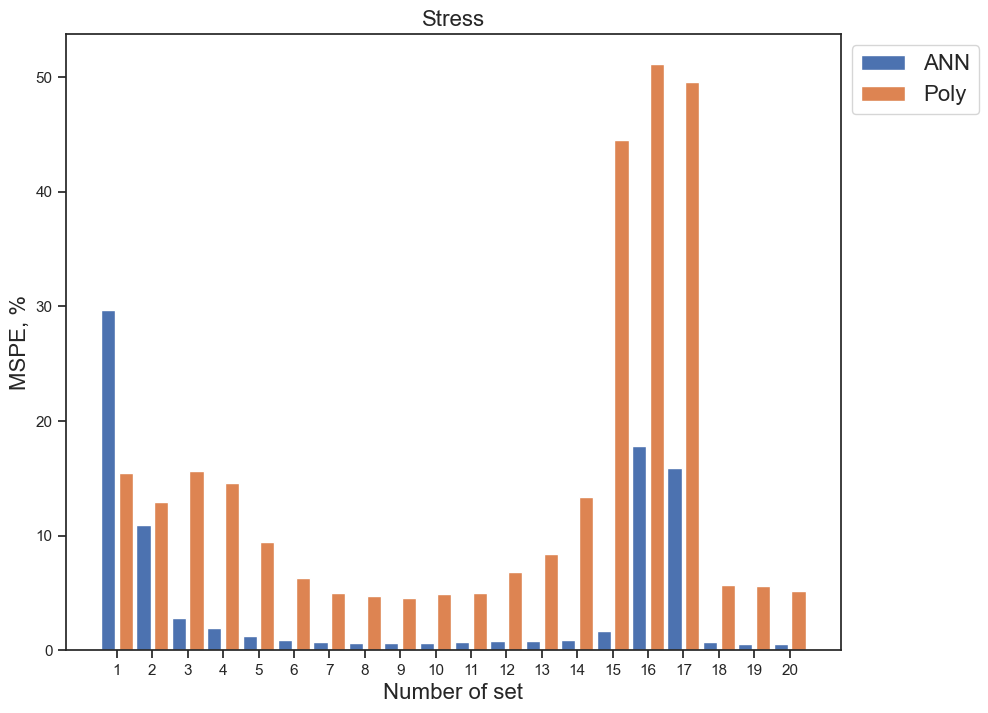

In [ ]:
plt.figure(figsize=(10, 8))
plt.bar(a-0.25 ,MSPE_ann_stress_v,0.4,label='ANN')
plt.bar(a+0.25 ,MSPE_poly_stress_v,0.4,label='Poly')
plt.xticks(a)
plt.title("Stress",fontsize=16)
plt.ylabel('MSPE, %',fontsize=16)
plt.xlabel("Number of set",fontsize=16)
plt.legend(loc="upper left", bbox_to_anchor=(1,1), fontsize=16)
#plt.ylim(0,100)
plt.show()

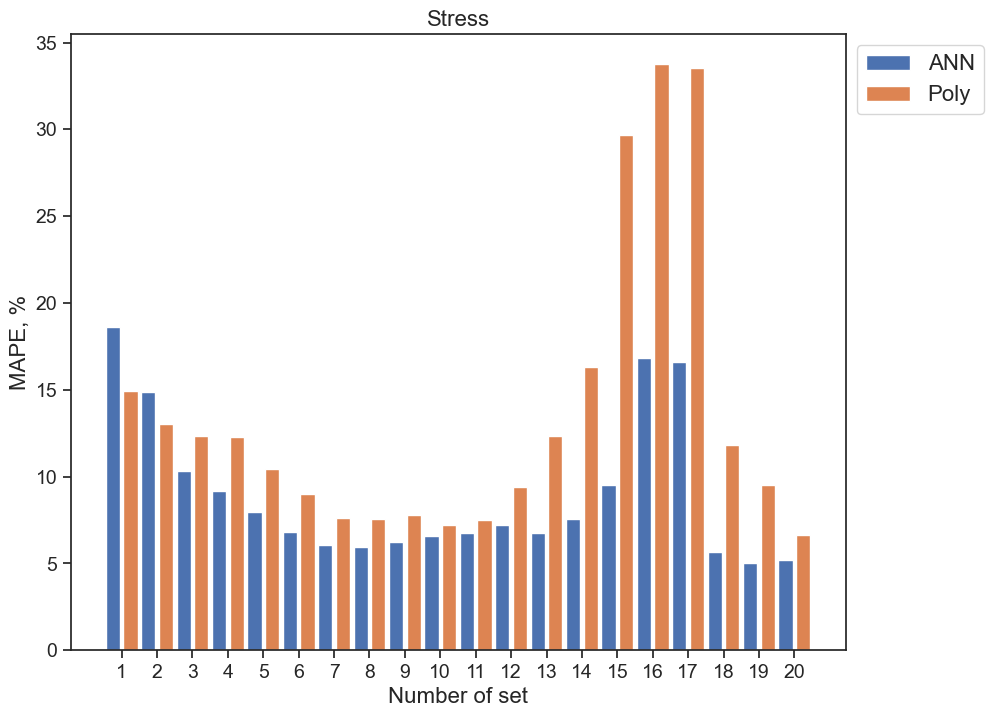

In [ ]:
plt.figure(figsize=(10, 8))
plt.bar(a-0.25 ,MAPE_ann_stress_v,0.4,label='ANN')
plt.bar(a+0.25 ,MAPE_poly_stress_v,0.4,label='Poly')
plt.xticks(a,fontsize=14)
plt.yticks(fontsize=14)
plt.title("Stress",fontsize=16)
plt.ylabel('MAPE, %',fontsize=16)
plt.xlabel("Number of set",fontsize=16)
plt.legend(loc="upper left", bbox_to_anchor=(1,1), fontsize=16)
#plt.ylim(0,50)
plt.show()

In [ ]:
MAPE_ann_strain_v = []
MAPE_poly_strain_v = []
MSPE_ann_strain_v = []
MSPE_poly_strain_v = []

for k in range(0,20):
    MAPE_ann_strain_v.append((abs(np.array(ann_strain_11_10_1[:][k]) -np.array(fem_strain_1[:][k]))/abs(np.array(fem_strain_1[:][k]))).mean()*100) # MAPE
    #print() #R^2
    MAPE_poly_strain_v.append((abs(np.array(poly_strain_1[:][k]) -np.array(fem_strain_1[:][k]))/abs(np.array(fem_strain_1[:][k]))).mean()*100)
    MSPE_ann_strain_v.append( (((abs(np.array(ann_strain_11_10_1[:][k]) -np.array(fem_strain_1[:][k]))) / (abs(np.array(fem_strain_1[:][k])) + 1e-8))**2).mean()*100  ) #MSPE
    MSPE_poly_strain_v.append( (((abs(np.array(poly_strain_1[:][k]) -np.array(fem_strain_1[:][k]))) / (abs(np.array(fem_strain_1[:][k])) + 1e-8))**2).mean()*100  )
    #print('*********************')

np.array(MAPE_ann_strain_v).mean(),np.array(MAPE_poly_strain_v).mean()

(3.850139278928835, 5.168518305501712)

In [ ]:
np.array(MAPE_ann_strain_v).min(),np.array(MAPE_poly_strain_v).min()

(2.5110165791366943, 3.309534590837822)

In [ ]:
np.array(MAPE_ann_strain_v).max(),np.array(MAPE_poly_strain_v).max()

(6.549914153269118, 9.745007472174082)

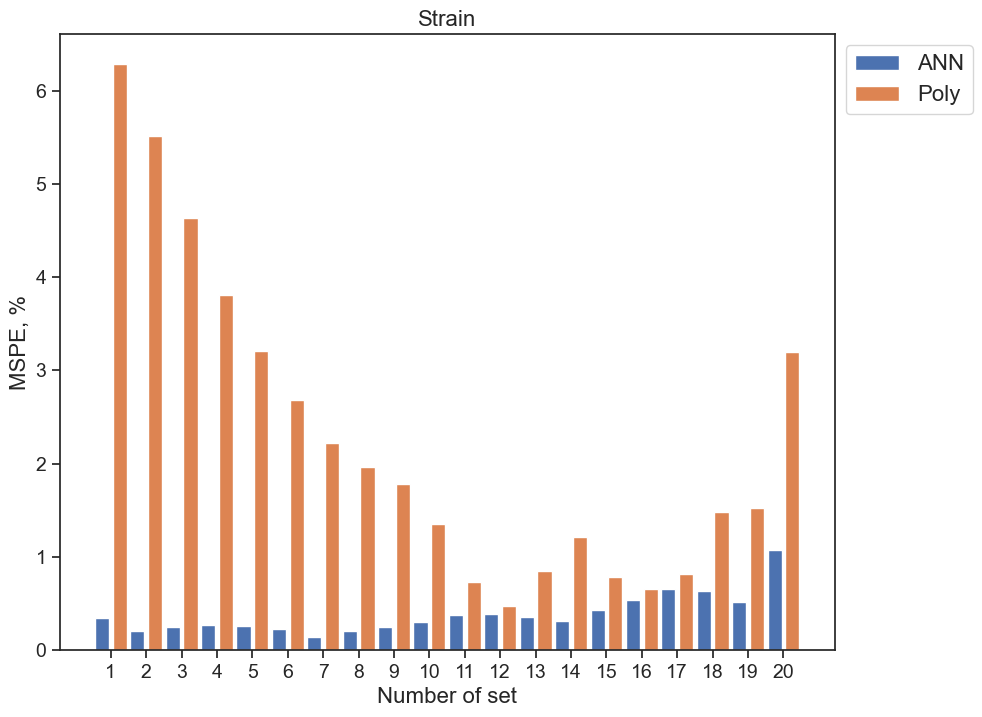

In [ ]:
plt.figure(figsize=(10, 8))
plt.bar(a-0.25 ,MSPE_ann_strain_v,0.4,label='ANN')
plt.bar(a+0.25 ,MSPE_poly_strain_v,0.4,label='Poly')
plt.xticks(a,fontsize=14)
plt.yticks(fontsize=14)
plt.title("Strain",fontsize=16)
plt.ylabel('MSPE, %',fontsize=16)
plt.xlabel("Number of set",fontsize=16)
plt.legend(loc="upper left", bbox_to_anchor=(1,1), fontsize=16)
#plt.ylim(0,15)
plt.show()

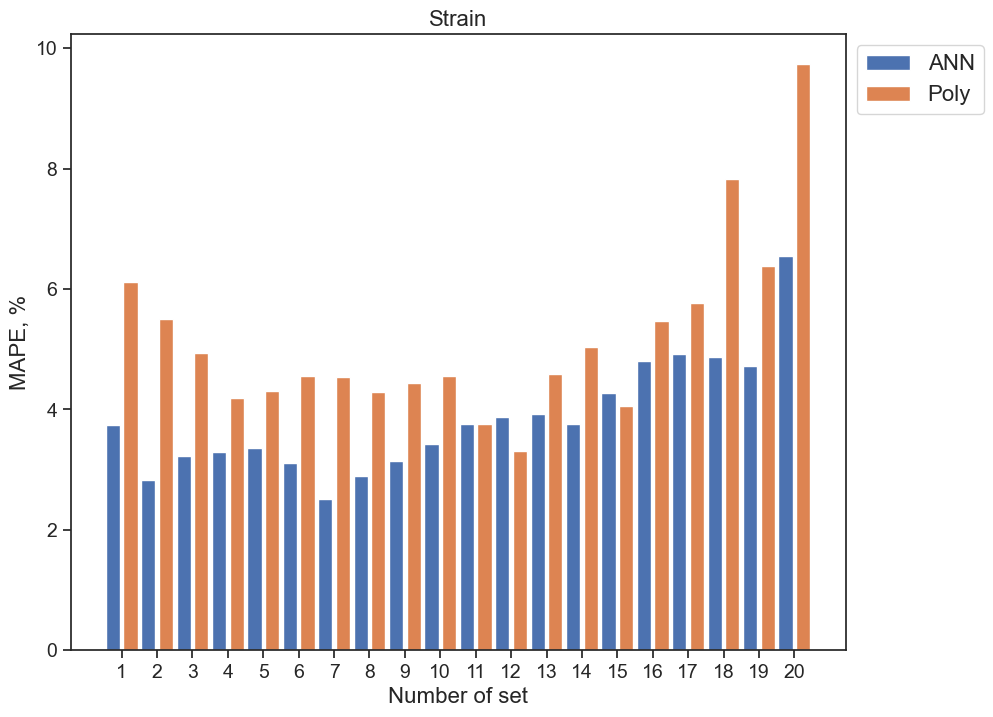

In [ ]:
plt.figure(figsize=(10, 8))
plt.bar(a-0.25 ,MAPE_ann_strain_v,0.4,label='ANN')
plt.bar(a+0.25 ,MAPE_poly_strain_v,0.4,label='Poly')
plt.xticks(a,fontsize=14)
plt.yticks(fontsize=14)
plt.title("Strain",fontsize=16)
plt.ylabel('MAPE, %',fontsize=16)
plt.xlabel("Number of set",fontsize=16)
plt.legend(loc="upper left", bbox_to_anchor=(1,1), fontsize=16)
#plt.ylim(0,15)
plt.show()

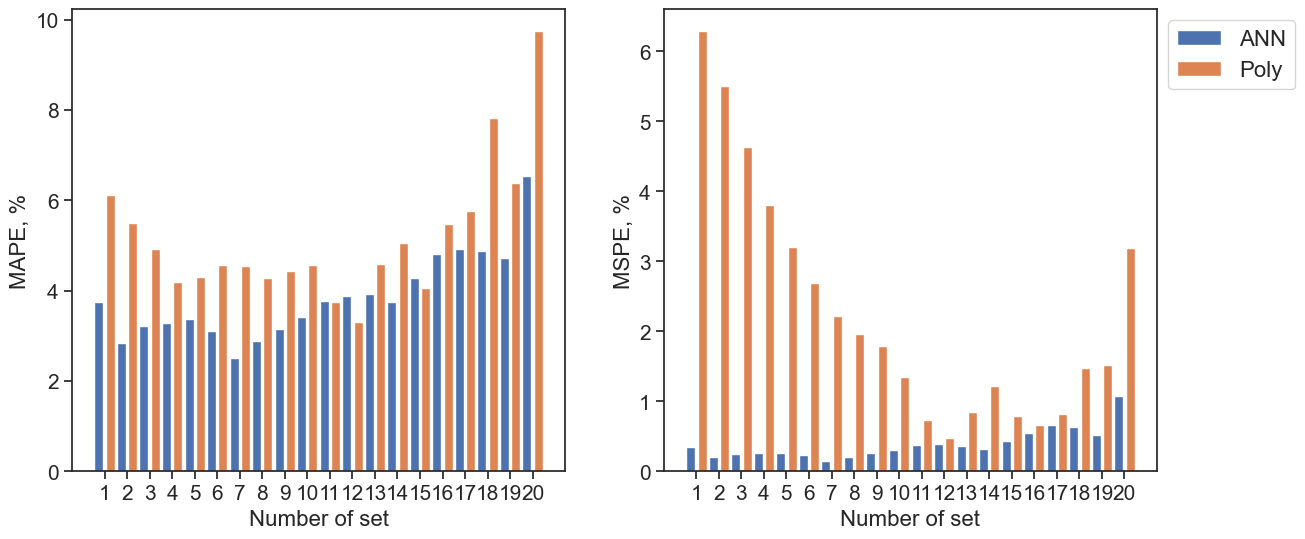

In [ ]:
plt.figure(figsize=(14, 6))
#ax = plt.axes()
#ax.set(facecolor = "white")
plt.subplot(1, 2, 1)

plt.bar(a-0.25 ,MAPE_ann_strain_v,0.4,label='ANN')
plt.bar(a+0.25 ,MAPE_poly_strain_v,0.4,label='Poly')
plt.xticks(a,fontsize=15)
plt.yticks(fontsize=15)
#plt.title("Strain",fontsize=16)
plt.ylabel('MAPE, %',fontsize=16)
plt.xlabel("Number of set",fontsize=16)
#plt.legend(loc="upper left", bbox_to_anchor=(1,1), fontsize=16)
#plt.ylim(0,15)
plt.subplot(1,2, 2)
plt.bar(a-0.25 ,MSPE_ann_strain_v,0.4,label='ANN')
plt.bar(a+0.25 ,MSPE_poly_strain_v,0.4,label='Poly')
plt.xticks(a,fontsize=15)
plt.yticks(fontsize=15)
#plt.title("Strain",fontsize=16)
plt.ylabel('MSPE, %',fontsize=16)
plt.xlabel("Number of set",fontsize=16)
plt.legend(loc="upper left", bbox_to_anchor=(1,1), fontsize=16)
plt.savefig('MAPE_MSPE_strain.png',transparent = True, bbox_inches ='tight', pad_inches = 0.1,dpi=600)
plt.show()

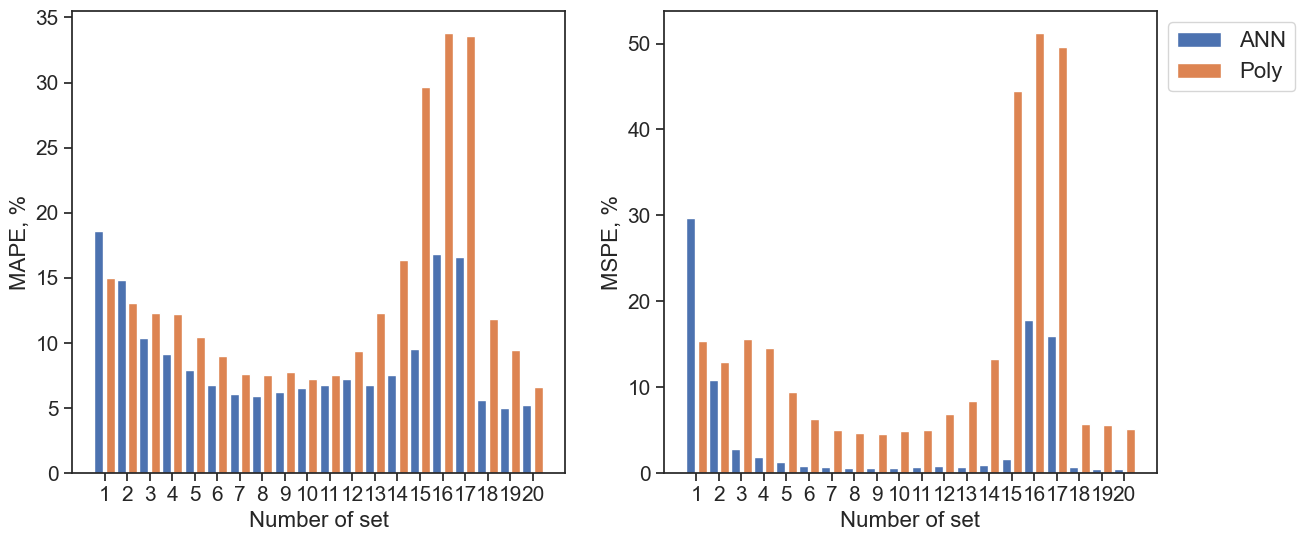

In [ ]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)

plt.bar(a-0.25 ,MAPE_ann_stress_v,0.4,label='ANN')
plt.bar(a+0.25 ,MAPE_poly_stress_v,0.4,label='Poly')
plt.xticks(a,fontsize=15)
plt.yticks(fontsize=15)
#plt.title("Stress",fontsize=16)
plt.ylabel('MAPE, %',fontsize=16)
plt.xlabel("Number of set",fontsize=16)
#plt.legend(loc="upper left", bbox_to_anchor=(1,1), fontsize=16)

plt.subplot(1, 2, 2)
plt.bar(a-0.25 ,MSPE_ann_stress_v,0.4,label='ANN')
plt.bar(a+0.25 ,MSPE_poly_stress_v,0.4,label='Poly')
plt.xticks(a,fontsize=15)
plt.yticks(fontsize=15)
#plt.title("Stress",fontsize=16)
plt.ylabel('MSPE, %',fontsize=16)
plt.xlabel("Number of set",fontsize=16)
plt.legend(loc="upper left", bbox_to_anchor=(1,1), fontsize=16)
plt.savefig('MAPE_MSPE_stress.png',transparent = True, bbox_inches ='tight', pad_inches = 0.1,dpi=600)
plt.show()

# Гистограммы ошибок для компонент тензора остаточных напряжений. Датасет без скоростей волочения.

Построение гистограмм ошибок MSPE, EV для моделей, обученных на датасете без учёта скорости волочения и скоростей деформаций. Код, представленный далее, является модификацией кода, который был выше для интенсивностей напряжений.

In [ ]:
# Копия из файла analysis_functions.py
def flatten_r(X_train_fair, y_train_fair):
    # ic(y_train_fair.shape)
    X_1 = np.zeros((len(X_train_fair) * 20, X_train_fair.shape[1] + 1))
    y_1 = np.zeros((len(X_train_fair) * 20,))
    for i in range(len(X_train_fair)):
        for j in range(20):
            X_1[i * 20 + j] = np.hstack((X_train_fair[i], j / 19))
            y_1[i * 20 + j] = y_train_fair[i][j]
    return X_1, y_1

Подключение диска. Путь к файлам

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Достаём датасет, затем преобразовываем его в необходимый формат (добавление обезразмеренного радиуса)


In [ ]:
path_import = '/content/drive/Shareddrives/project_1740/720'

X_stress_components = opener('X_stress_components')
y_stress_components = opener('y_stress_components')

print(X_stress_components.shape)
print(X_stress_components[0].shape)
print(y_stress_components.shape)

/content/drive/Shareddrives/project_1740/720/X_stress_components.pkl
/content/drive/Shareddrives/project_1740/720/y_stress_components.pkl
(3, 716, 4)
(716, 4)
(3, 716, 20)


In [ ]:
comp_no = 2

X_0_data, y_0_data = flatten_r(X_stress_components[comp_no], y_stress_components[comp_no])
print(X_0_data.shape)
print(y_0_data.shape)

(14320, 5)
(14320,)


In [ ]:
i=0
X_0_data[i*20:(i+1)*20]

array([[0.1  , 0.   , 8.   , 0.1  , 0.   ],
       [0.1  , 0.   , 8.   , 0.1  , 0.053],
       [0.1  , 0.   , 8.   , 0.1  , 0.105],
       [0.1  , 0.   , 8.   , 0.1  , 0.158],
       [0.1  , 0.   , 8.   , 0.1  , 0.211],
       [0.1  , 0.   , 8.   , 0.1  , 0.263],
       [0.1  , 0.   , 8.   , 0.1  , 0.316],
       [0.1  , 0.   , 8.   , 0.1  , 0.368],
       [0.1  , 0.   , 8.   , 0.1  , 0.421],
       [0.1  , 0.   , 8.   , 0.1  , 0.474],
       [0.1  , 0.   , 8.   , 0.1  , 0.526],
       [0.1  , 0.   , 8.   , 0.1  , 0.579],
       [0.1  , 0.   , 8.   , 0.1  , 0.632],
       [0.1  , 0.   , 8.   , 0.1  , 0.684],
       [0.1  , 0.   , 8.   , 0.1  , 0.737],
       [0.1  , 0.   , 8.   , 0.1  , 0.789],
       [0.1  , 0.   , 8.   , 0.1  , 0.842],
       [0.1  , 0.   , 8.   , 0.1  , 0.895],
       [0.1  , 0.   , 8.   , 0.1  , 0.947],
       [0.1  , 0.   , 8.   , 0.1  , 1.   ]])

Достаём модели, которые получили в результате обучения на датасете, в котором не учитывалась скорость волочения

In [ ]:
path_import = '/content/drive/Shareddrives/project_1740/720/' + str(comp_no)
print(path_import)

model_stress_ann = opener('20_neurons_11_layers_adam_solver_relu_activation_5_n_splits')[0]

/content/drive/Shareddrives/project_1740/720/2
/content/drive/Shareddrives/project_1740/720/2/20_neurons_11_layers_adam_solver_relu_activation_5_n_splits.pkl


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:376: InconsistentVersionWarning:

Trying to unpickle estimator StandardScaler from version 1.2.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:376: InconsistentVersionWarning:

Trying to unpickle estimator MLPRegressor from version 1.2.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:376: InconsistentVersionWarning:

Trying to unpickle estimator Pipeline from version 1.2.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk

In [ ]:
# Проверяем тип модели
print(f"Тип модели: {type(model_stress_ann)}")

# Просматриваем доступные атрибуты и методы
print("Доступные атрибуты и методы:")
print(dir(model_stress_ann))

help(model_stress_ann.get_metadata_routing)
print(model_stress_ann.__abstractmethods__)

Тип модели: <class 'sklearn.pipeline.Pipeline'>
Доступные атрибуты и методы:
['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__sklearn_is_fitted__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_build_request_for_signature', '_can_fit_transform', '_can_inverse_transform', '_can_transform', '_check_feature_names', '_check_method_params', '_check_n_features', '_doc_link_module', '_doc_link_template', '_doc_link_url_param_generator', '_estimator_type', '_final_estimator', '_fit', '_get_default_requests', '_get_doc_link', '_get_metadata_request', '_get_param_names', '_get_params', '_get_tags', '_iter', '_log_

Распаковка результатов: Результат предсказания моделью и результат моделированием МКЭ

In [ ]:
# Пример элемента
a = X_0_data[0]
a

array([0.1, 0. , 8. , 0.1, 0. ])

In [ ]:
model_stress_ann.predict(a.reshape(1, -1))

array([-110.939])

In [ ]:
stress_ann =[]
for k in range(0,20):
    ann = []
    for i in range(0, len(y_0_data) // 20):
        if X_0_data[i*20][4] == 0.0 :
            ann.append(model_stress_ann.predict(X_0_data[i*20:(i+1)*20])[k])
    stress_ann.append(ann)


print(len(stress_ann))
print(len(stress_ann[0]))
print(f"Example:{stress_ann[0]}")

20
716
Example:[-114.42005951039637, -109.3501214630652, -103.88022956560731, -109.84111213490345, -109.87120811131311, -107.89639826394396, -114.2873434883029, -109.21293816219006, -108.74323501223562, -105.44194168004971, -112.12933981045425, -106.57985836569785, -107.99988743214651, -110.91727686829647, -113.17259409956735, -107.25653985205732, -128.27384653909422, -106.32735537694589, -104.85598056695568, -129.53084677082694, -128.04763752925535, -126.52226173367815, -129.49176346782443, -128.66637460871655, -127.2434991716265, -128.40468922896835, -129.66969251311508, -128.7509988389138, -129.2448419248542, -128.47303358460184, -23.13376870601494, -129.93137789286334, -127.43735178984137, -130.16554207622647, -129.12289096414466, -20.75858610833597, -20.934872897130173, -21.145437824884272, -23.586459332590554, -26.943114594448566, -23.317916215474654, -24.25880017329118, -21.88938451457991, -22.650070038501347, -26.377243199020974, -21.88973079856571, -24.497674056702866, -22.553

In [ ]:
fem_stress_0 = []
for j in range(0,20):
    fem = []
    for i in range(0, len(y_0_data) // 20):
        fem.append(y_0_data[i*20:(i+1)*20][j])
    fem_stress_0.append(fem)

print(len(fem_stress_0))
print(len(fem_stress_0[0]))

20
716


In [ ]:
"""
poly_stress_1 =[]
for j in range(0,20):
    poly = []
    for i in range(0, len(y_val_fair_stress) // 20):
        if X_val_fair_stress[i*20][4] == 0.0 :
            poly.append(poly_stress_best.predict(X_val_fair_stress[i*20:(i+1)*20])[j])
    poly_stress_1.append(poly)
poly_stress_1
"""

Расчёт интересующих метрик вдоль обезразмеренного радиуса

In [ ]:
#MAPE_ann_stress_v = []
#MAPE_poly_stress_v = []
#MSPE_ann_stress_v = []
#MSPE_poly_stress_v = []
EV_ann_stress_v = []
#MSPE_poly_stress_v = []
RMSE_ann_stress_v = []
#MSPE_poly_stress_v = []

for k in range(0, 20):
    #MAPE_ann_stress_v.append((abs(np.array(stress_ann[k]) -np.array(fem_stress_0[k]))/abs(np.array(fem_stress_0[k]))).mean()*100) # MAPE
    #print() #R^2
    #MAPE_poly_stress_v.append((abs(np.array(poly_stress_1[:][k]) -np.array(fem_stress_1[:][k]))/abs(np.array(fem_stress_1[:][k]))).mean()*100)
    #MSPE_ann_stress_v.append( (((abs(np.array(stress_ann[k]) -np.array(fem_stress_0[k]))) / (abs(np.array(fem_stress_0[k])) + 1e-8))**2).mean()*100  ) #MSPE
    #MSPE_poly_stress_v.append( (((abs(np.array(poly_stress_1[:][k]) -np.array(fem_stress_1[:][k]))) / (abs(np.array(fem_stress_1[:][k])) + 1e-8))**2).mean()*100  )
    EV_ann_stress_v.append(  1 - np.var(np.array(fem_stress_0[k])-np.array(stress_ann[k]), ddof=1) / np.var(np.array(fem_stress_0[k]), ddof=1) ) #EV
    #MSPE_poly_stress_v.append( (((abs(np.array(poly_stress_1[:][k]) -np.array(fem_stress_1[:][k]))) / (abs(np.array(fem_stress_1[:][k])) + 1e-8))**2).mean()*100  )
    RMSE_ann_stress_v.append(np.sqrt(np.mean( (np.array(fem_stress_0[k])-np.array(stress_ann[k]))**2 ) )) #RMSE
    #MSPE_poly_stress_v.append( (((abs(np.array(poly_stress_1[:][k]) -np.array(fem_stress_1[:][k]))) / (abs(np.array(fem_stress_1[:][k])) + 1e-8))**2).mean()*100  )
    #print('*********************')

EV_ann_stress_v
#, MSPE_poly_stress_v

[0.9960865448930794,
 0.9971010866593477,
 0.9981058357017916,
 0.9987269344031167,
 0.9988798513083731,
 0.9988919341212817,
 0.9989792588273356,
 0.9989749708729055,
 0.9989736866906038,
 0.998938671756444,
 0.9988556592857005,
 0.9986139506298646,
 0.9984014627711976,
 0.9979494875108595,
 0.9972511818325429,
 0.9962121596423947,
 0.992803133282714,
 0.9791663312956111,
 0.9251681121653035,
 0.6865251392127758]

Гистограммы

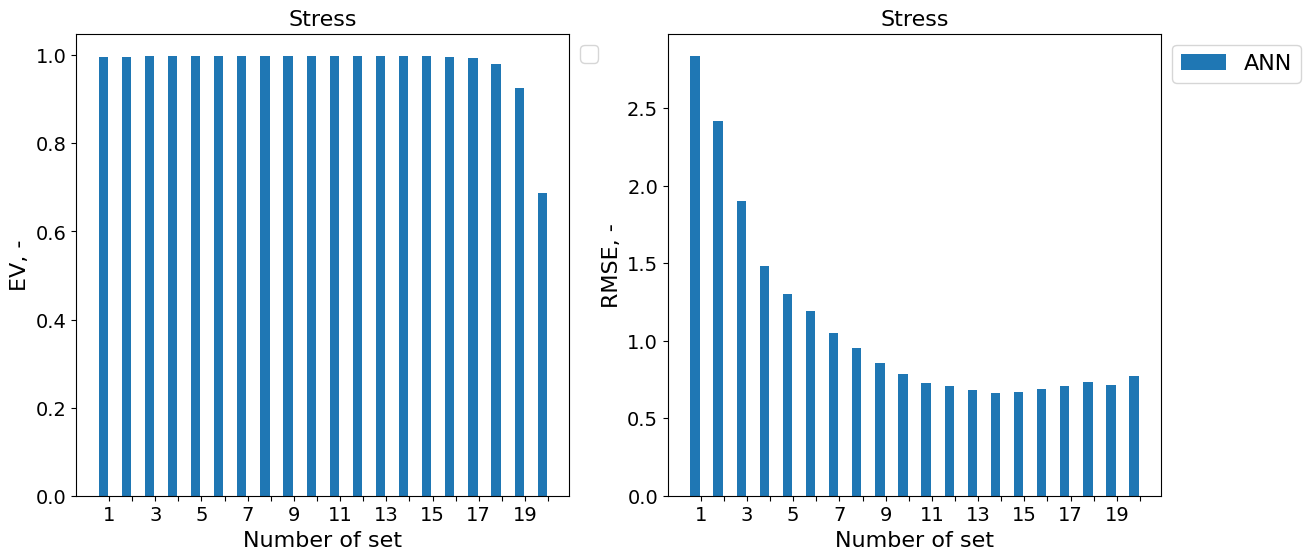

In [ ]:
a = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.bar(a-0.25, EV_ann_stress_v,0.4)#, label='ANN')
#plt.bar(a+0.25, MSPE_poly_stress_v,0.4, label='Poly')
plt.xticks(a, fontsize=14, labels=[str(i+1) if i % 2 == 0 else '' for i in range(20)])
plt.yticks(fontsize=14)
plt.title("Stress",fontsize=16)
plt.ylabel('EV, -', fontsize=16)
plt.xlabel("Number of set", fontsize=16)
plt.legend(loc="upper left", bbox_to_anchor=(1,1), fontsize=16)

plt.subplot(1, 2, 2)
plt.bar(a-0.25, RMSE_ann_stress_v,0.4, label='ANN')
#plt.bar(a+0.25, MSPE_poly_stress_v,0.4, label='Poly')
plt.xticks(a, fontsize=14, labels=[str(i+1) if i % 2 == 0 else '' for i in range(20)])
plt.yticks(fontsize=14)
plt.title("Stress",fontsize=16)
plt.ylabel('RMSE, -', fontsize=16)
plt.xlabel("Number of set", fontsize=16)
plt.legend(loc="upper left", bbox_to_anchor=(1,1), fontsize=16)


path_export = '/content/drive/Shareddrives/project_1740/pics/Гистограммы для метрик/'
plt.savefig(path_export + 'stress_' + str(comp_no) + '_EV_RMSE (model 1000 9).png',transparent = True, bbox_inches ='tight', pad_inches = 0.1,dpi=600)
plt.show()

# Непараметрический статистический анализ

### Тест Уилкоксона (или тест знаков рангов)

In [ ]:
import numpy as np
from scipy import stats

Расчёт p-value для каждого узла

In [ ]:
p_values = np.zeros(20)
for i in range(20):
  # Примерные данные (векторы)
  original_data = np.array(fem_stress_0[i])
  predictions = np.array(stress_ann[i])

  # Проведение теста Уилкоксона
  statistic, p_value = stats.wilcoxon(original_data, predictions)
  p_values[i] = p_value

  # Вывод результатов
  print(f"Статистика теста: {statistic}")
  print(f"{i}: p-значение: {p_value}")

  # Интерпретация результатов
  alpha = 0.05
  if p_value < alpha:
      print("Отвергаем нулевую гипотезу: имеются статистически значимые различия между выборками.")
  else:
      print("Не отвергаем нулевую гипотезу: статистически значимых различий нет.")

Статистика теста: 41982.0
0: p-значение: 7.447172811067998e-55
Отвергаем нулевую гипотезу: имеются статистически значимые различия между выборками.
Статистика теста: 73297.0
1: p-значение: 2.721281759329249e-23
Отвергаем нулевую гипотезу: имеются статистически значимые различия между выборками.
Статистика теста: 52669.0
2: p-значение: 1.571141781908275e-42
Отвергаем нулевую гипотезу: имеются статистически значимые различия между выборками.
Статистика теста: 81007.0
3: p-значение: 1.2325914373187822e-17
Отвергаем нулевую гипотезу: имеются статистически значимые различия между выборками.
Статистика теста: 104036.0
4: p-значение: 1.1317544130355846e-05
Отвергаем нулевую гипотезу: имеются статистически значимые различия между выборками.
Статистика теста: 117483.0
5: p-значение: 0.049816540920730144
Отвергаем нулевую гипотезу: имеются статистически значимые различия между выборками.
Статистика теста: 106806.0
6: p-значение: 0.00010023666150551774
Отвергаем нулевую гипотезу: имеются статисти

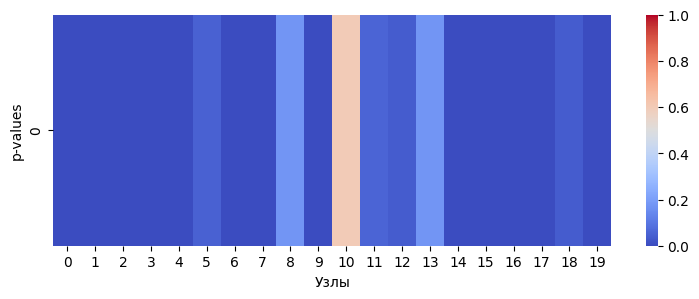

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Преобразуем 1D массив в 2D (например, 2 строки и 5 столбцов)
data_2d = p_values.reshape(1, 20)

# Создаем тепловую карту с помощью Seaborn
plt.figure(figsize=(9, 3))  # Устанавливаем размер фигуры
#sns.heatmap(data_2d, annot=True, cmap='hot', cbar=True)
sns.heatmap(data_2d, cmap='coolwarm', cbar=True, vmin=0, vmax=1)
#sns.heatmap(data_2d, cbar=True)

# Настраиваем заголовок и метки
#plt.title('p-values')
plt.xlabel('Узлы')
plt.ylabel('p-values')

# Показываем тепловую карту
#plt.show()

path_export = '/content/drive/Shareddrives/project_1740/pics/Гистограммы для метрик/'
plt.savefig(path_export + 'stress_' + str(comp_no) + '_p_values (model 20 11).png',transparent = True, bbox_inches ='tight', pad_inches = 0.1,dpi=600)
plt.show()

In [ ]:
# Устанавливаем точность вывода
np.set_printoptions(precision=3)
print(p_values > 0.05)

[False False False False False  True False False False False False False
 False False False False False False False  True]
